In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle as pkl
import os, sys
sys.path.append("/home/centos/CGMD/")
# from pyMD import analysis as ans

from matplotlib.font_manager import FontProperties
from matplotlib import rcParams
config = {
    "mathtext.fontset":"stix",
    "font.family":'STIXGeneral',
    "font.serif":['SimSun'],
}
rcParams.update(config)
SimSun = FontProperties(fname='/home/centos/anaconda3/envs/md/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/SimSun.ttf')


In [8]:
with open("/home/centos/CGMD/DFT/energy.pkl", "rb") as file:
    dm, Em = pkl.load(file)

data/uu_cgu_parallel.pkl
1.4576942435331801e-05
13.99000000000001
data/uu_cgu_head-tail.pkl
-11.666916894142453
4.570000000000003
data/uu_cg.pkl
-1.1627516697164357
4.51


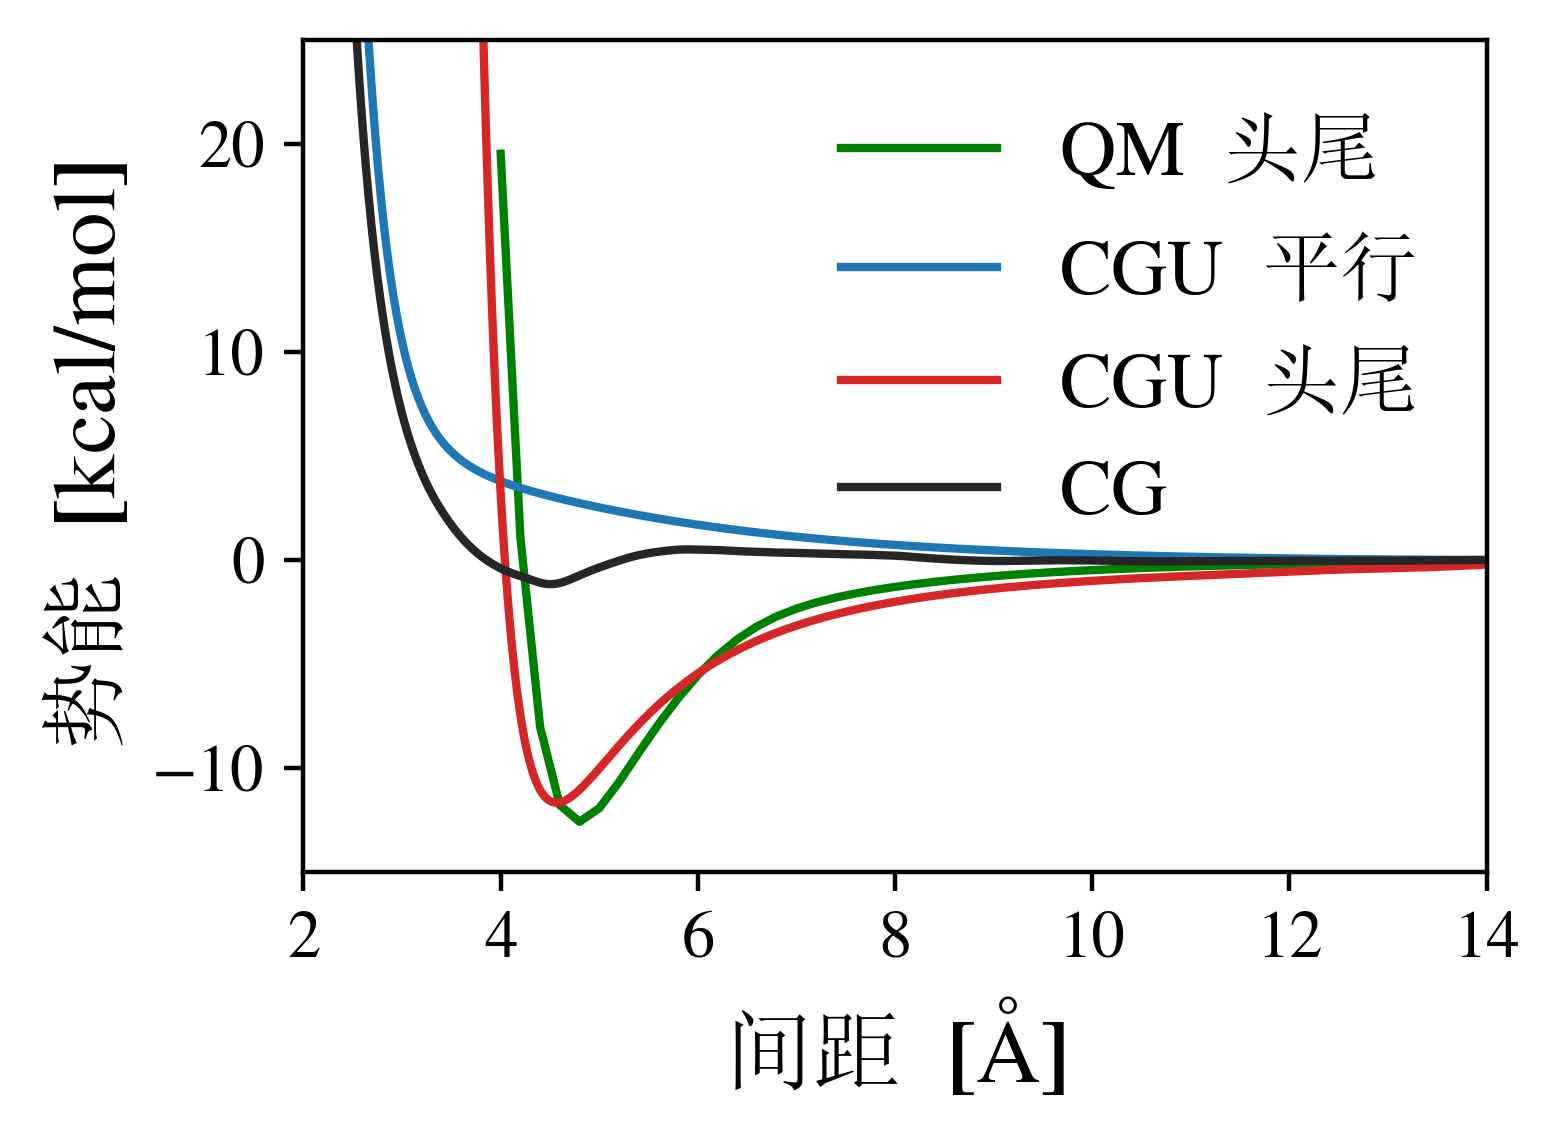

In [12]:
dpi=400
fontsize=12
inch_cm = 1 / 2
fig = plt.figure(dpi=dpi, figsize=(8 * inch_cm, 6 * inch_cm))

labels = [r"$\mathrm{CGU}$ 平行", r"$\mathrm{CGU}$ 头尾", r"$\mathrm{CG}$"]
fps = ["data/uu_cgu_parallel.pkl", "data/uu_cgu_head-tail.pkl", "data/uu_cg.pkl"]
colors = ["tab:blue", "tab:red", "0.15"]
plt.plot(dm, Em, label=r"$\mathrm{QM}$ 头尾", color="green")
for i in range(3):
    with open(fps[i], "rb") as file:
        x, y = pkl.load(file)
    plt.plot(x, y, label=labels[i], color=colors[i])
    print(fps[i])
    print(y.min())
    print(x[y.argmin()])



plt.ylim(-15, 25)
plt.xlim(2, 14)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)

fontdict = {"fontproperties":SimSun, "fontsize":fontsize+4}
plt.xlabel(r"间距 $\mathbf{[} \mathrm{\AA} \mathbf{]}$", fontdict=fontdict)
plt.ylabel(r"势能 $\mathbf{[} \mathrm{kcal/mol} \mathbf{]}$", fontdict=fontdict)
labels = plt.legend(fontsize=fontsize+2, frameon=False).get_texts()
[label.set_fontproperties(SimSun) for label in labels]
[label.set_size(fontsize+2) for label in labels]

plt.tight_layout()
plt.savefig("2 uu.jpg", dpi=dpi)
plt.show()

[1.67106593e-02 9.13321181e-01 3.32393619e+00 1.38598777e+03]
[2.34255800e-02 8.71223739e-01 2.93945784e+00 2.99014177e+02]
(0.7786867995345316, 1.0138332346668)


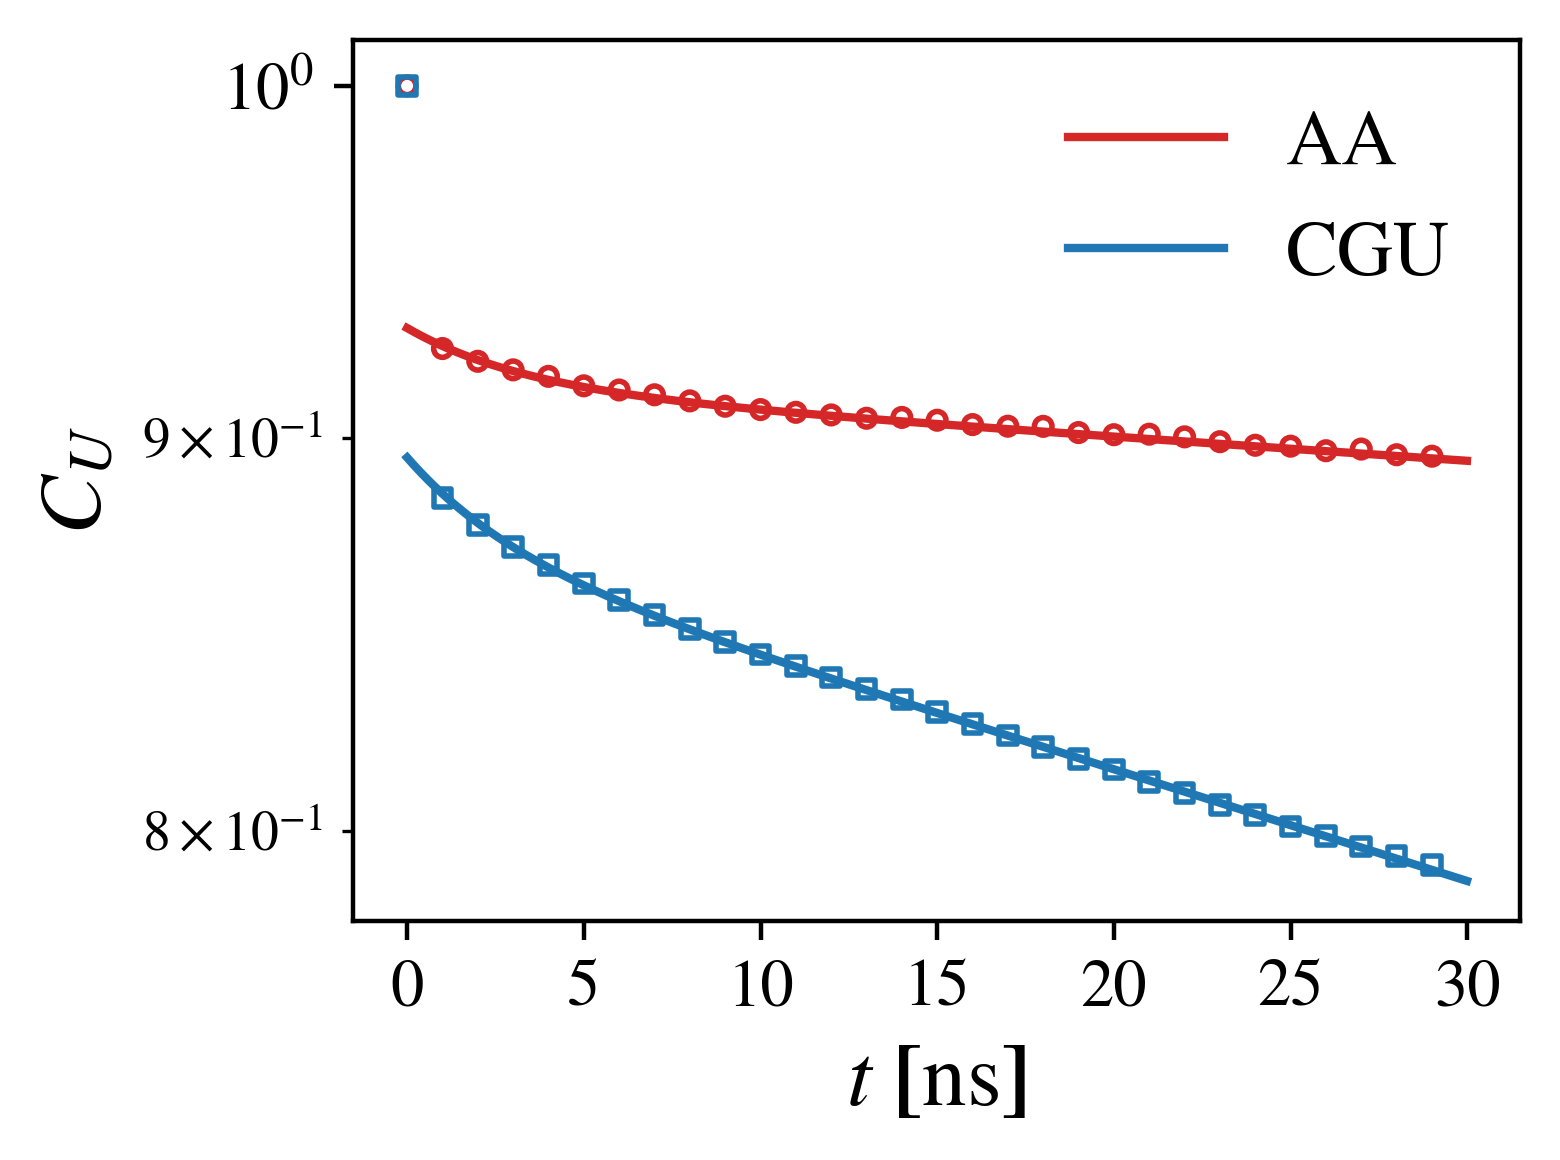

In [19]:

def cc_double_relax(x, a, b, t1, t2):
    return a * np.exp(-x / t1) + b * np.exp(-x / t2)


def linear(x, k, b):
    return k * x + b

from scipy.optimize import curve_fit

dpi = 400
fontsize=12
plt.figure(dpi=dpi, figsize=(4,3))

y_dict = dict()
# AA
cut_off = 5
title = "aa"
label = "npt_7"
frames = 4000
steps = 10000
nums = 2000
start_delta = 40000
with open("data/urea_%s_%d_%d_%d_%d.pkl" % (title, steps, frames, nums, start_delta), "rb") as f:
    y_dict["AA"] = pkl.load(f)

# CGU new
title = "cgu"
frames = 4000
steps = 10000
nums = 3000
start_delta = 40000
with open("data/urea_%s_%d_%d_%d_%d.pkl" % (title, steps, frames, nums, start_delta), "rb") as f:
    y_dict["CGU"] = pkl.load(f)

# # CG new
# title = "cg"
# frames = 4000
# steps = 10000
# nums = 2000
# start_delta = 40000
# with open("data/urea_%s_%d_%d_%d_%d.pkl" % (title, steps, frames, nums, start_delta), "rb") as f:
#     y_dict["CG"] = pkl.load(f)

# x = np.arange(4000) * steps / 1000000
x = np.arange(3000) * steps / 1000000

# plt.gca().set_yscale('log')
ecolor = {"AA": "tab:red", "CGU": "tab:blue", "CG":"0.15"}
marker = {"AA": "o", "CGU": "s", "CG":"v"}
for k, v in y_dict.items():
    y = v[:len(x)]
    plt.scatter(x[::100], y[::100], color='', edgecolor=ecolor[k], s=10, marker=marker[k])
    fit_func = cc_double_relax
    p0 = [0.5, 0.5, 0.01, 100000]
    bound_l = [0, 0, 0, 0]
    bound_r = [np.inf, np.inf, np.inf, np.inf]
    popt, _ = curve_fit(fit_func, x[1:], y[1:], p0, bounds=(bound_l, bound_r))
    plt.plot(x, fit_func(x, *popt), label=k, color=ecolor[k])
    print(popt)

plt.xlabel(r'$t \ \mathbf{[} \mathrm{ns} \mathbf{]}$', fontdict={"fontproperties":SimSun, "fontsize":fontsize+4})
plt.ylabel('$C_U$', fontsize=fontsize+4)
plt.legend(frameon=False, fontsize=fontsize+2)
plt.yscale('log')
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
print(plt.gca().get_ylim())
# plt.ylim(0.0015, 15)
# plt.yticks(np.arange(2, 10)/10, np.arange(2, 10)/10)
# from matplotlib.ticker import MultipleLocator, FuncFormatter
# plt.gca().yaxis.set_minor_locator(MultipleLocator(0.01))
# plt.setp(plt.gca().get_yminorticklabels(), visible=False)
plt.tight_layout()
plt.savefig("2 uu_dy.jpg", dpi=dpi)
plt.show()

# for k, v in y_dict.items():
#     print(k)
#     y = np.log(v[:len(x)])
#     # y = np.log(y)
#     fit_func = linear
#     p0 = [-1, 1]
#     popt, _ = curve_fit(fit_func, x[-2000:-1000], y[-2000:-1000], p0)
#     print(popt)
#     print(-1/popt[0])
#     plt.plot(x, y)
#     plt.plot(x, linear(x, *popt))
# plt.show()

[1.67106593e-02 9.13321181e-01 3.32393619e+00 1.38598777e+03]
[2.34255800e-02 8.71223739e-01 2.93945784e+00 2.99014177e+02]
[0.51185031 0.11587291 0.48919129 8.03953153]


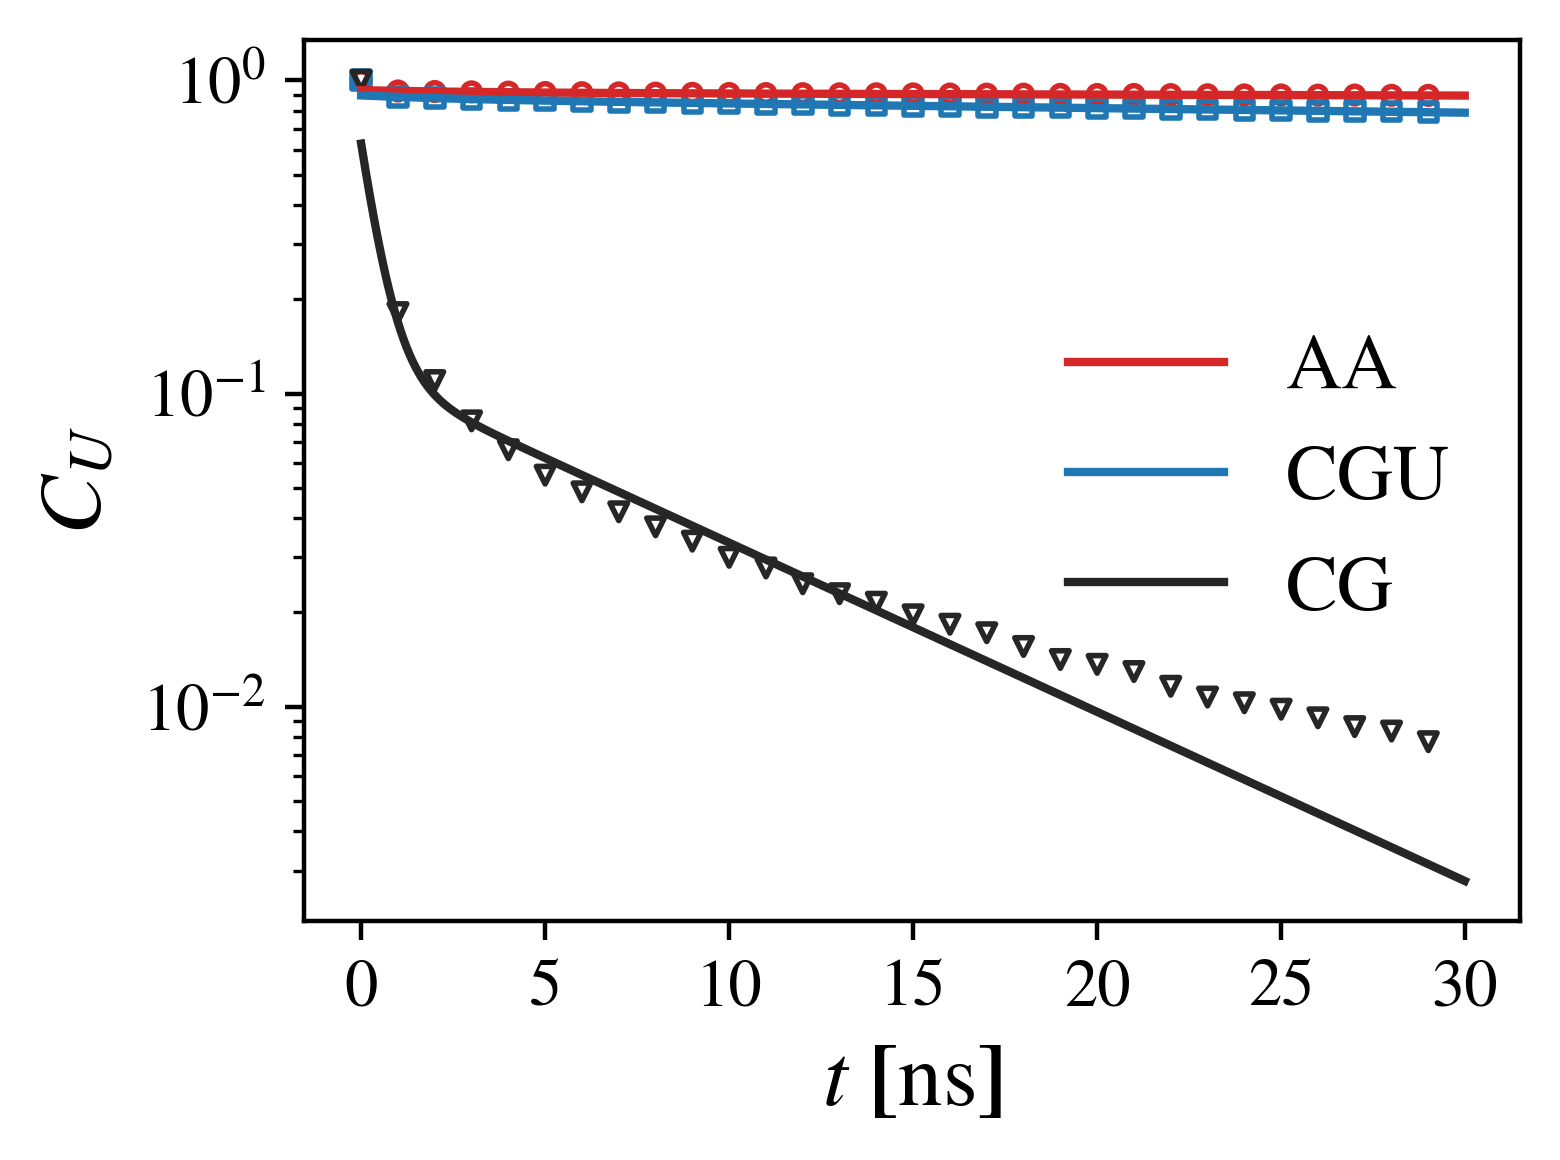

In [18]:

def cc_double_relax(x, a, b, t1, t2):
    return a * np.exp(-x / t1) + b * np.exp(-x / t2)


def linear(x, k, b):
    return k * x + b

from scipy.optimize import curve_fit

dpi = 400
fontsize=12
plt.figure(dpi=dpi, figsize=(4,3))

y_dict = dict()
# AA
cut_off = 5
title = "aa"
label = "npt_7"
frames = 4000
steps = 10000
nums = 2000
start_delta = 40000
with open("data/urea_%s_%d_%d_%d_%d.pkl" % (title, steps, frames, nums, start_delta), "rb") as f:
    y_dict["AA"] = pkl.load(f)

# CGU new
title = "cgu"
frames = 4000
steps = 10000
nums = 3000
start_delta = 40000
with open("data/urea_%s_%d_%d_%d_%d.pkl" % (title, steps, frames, nums, start_delta), "rb") as f:
    y_dict["CGU"] = pkl.load(f)

# CG new
title = "cg"
frames = 4000
steps = 10000
nums = 2000
start_delta = 40000
with open("data/urea_%s_%d_%d_%d_%d.pkl" % (title, steps, frames, nums, start_delta), "rb") as f:
    y_dict["CG"] = pkl.load(f)

# x = np.arange(4000) * steps / 1000000
x = np.arange(3000) * steps / 1000000

# plt.gca().set_yscale('log')
ecolor = {"AA": "tab:red", "CGU": "tab:blue", "CG":"0.15"}
marker = {"AA": "o", "CGU": "s", "CG":"v"}
for k, v in y_dict.items():
    y = v[:len(x)]
    plt.scatter(x[::100], y[::100], color='', edgecolor=ecolor[k], s=10, marker=marker[k])
    fit_func = cc_double_relax
    p0 = [0.5, 0.5, 0.01, 100000]
    bound_l = [0, 0, 0, 0]
    bound_r = [np.inf, np.inf, np.inf, np.inf]
    popt, _ = curve_fit(fit_func, x[1:], y[1:], p0, bounds=(bound_l, bound_r))
    plt.plot(x, fit_func(x, *popt), label=k, color=ecolor[k])
    print(popt)

plt.xlabel(r'$t \ \mathbf{[} \mathrm{ns} \mathbf{]}$', fontdict={"fontproperties":SimSun, "fontsize":fontsize+4})
plt.ylabel('$C_U$', fontsize=fontsize+4)
plt.legend(frameon=False, fontsize=fontsize+2)
plt.yscale('log')
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
# plt.ylim(0.0015, 15)
# plt.yticks(np.arange(2, 10)/10, np.arange(2, 10)/10)
# from matplotlib.ticker import MultipleLocator, FuncFormatter
# plt.gca().yaxis.set_minor_locator(MultipleLocator(0.01))
# plt.setp(plt.gca().get_yminorticklabels(), visible=False)
plt.tight_layout()
plt.savefig("2 uu_dy_1.jpg", dpi=dpi)
plt.show()

# for k, v in y_dict.items():
#     print(k)
#     y = np.log(v[:len(x)])
#     # y = np.log(y)
#     fit_func = linear
#     p0 = [-1, 1]
#     popt, _ = curve_fit(fit_func, x[-2000:-1000], y[-2000:-1000], p0)
#     print(popt)
#     print(-1/popt[0])
#     plt.plot(x, y)
#     plt.plot(x, linear(x, *popt))
# plt.show()